<a href="https://colab.research.google.com/github/EstebanmAcero/Machine_learning/blob/main/wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Luis Esteban Molina Acero 201910203**
# **Manuel Velez PhD.**

Diseñar un algoritmo para la clasificacion ya sea mediante una regresión para ver el porcentaje del vino, o de clasificación para ver si es un buen, medio o mal vino

In [3]:
from google.colab import drive
import pandas as pd

path = ('/content/drive/MyDrive/Wine_Quality_Dataset.csv')
wine_df = pd.read_csv(path)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



#<font face="Comic Sans MS,arial,verdana" color="Green" size =5> Mostrar la parte final e inicial del set de dato #

In [53]:
wine_df.head() # con esto se puede mostrar el encabezado del data set

,Quality,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,19.6714,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,4.8909,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,32.1424,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,13.0464,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,14.1468,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
wine_df.tail() # con esto se puede mostrar la parte final del data set

,Quality,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
173,96.6136,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,90.1209,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,84.6646,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,69.8258,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,91.3738,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



#<font face="Comic Sans MS,arial,verdana" color="Red" size =5> Buscamos los tipo de datos contenidos dentro de cada dataframe para saber como trabajarlos después.

In [ ]:
dir(wine_df)  # aca descubrimos todos los metodos que podemos aplicarle a nuestro dataframe

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Quality                       178 non-null    float64
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid Phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [6]:
type(wine_df)
wine_df.dtypes

Quality                         float64
Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of Ash               float64
Magnesium                         int64
Total Phenols                   float64
Flavanoids                      float64
Nonflavanoid Phenols            float64
Proanthocyanins                 float64
Color Intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [11]:
wine_df.describe() # descrimos que pasa con los datos cual es la media, alrededor de donde se encuentran los percentiles y valores maximos y mínimos

,Quality,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,48.380097,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,6.042247,2.611685,746.893258
std,27.326131,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,67.836170,0.709990,314.907474
min,1.096700,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,24.184800,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,48.011550,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.975000,2.780000,673.500000
75%,67.278825,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,99.496000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,906.000000,4.000000,1680.000000


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



#<font face="Comic Sans MS,arial,verdana" color="Blue" size= 6> Red Wine Quality Dataset Description


<n>The Red Wine Quality Dataset is a rich collection of data pertaining to the quality of various red wines. It encompasses 14 distinct features, offering comprehensive insights into both the chemical composition and sensory attributes of these wines.

>Quality (%): Represents the overall quality rating of wine as a percentage.

>Alcohol (%): Measures the alcohol content of the wine.

>Malic Acid and Ash: Indicate the levels of these chemicals in the wine.

>Alcalinity of Ash: Reflects the pH level, influencing flavor and texture.

>Magnesium: An essential nutrient for grape growth and development.

Additional features include:

* Total Phenols, Flavanoids, and Nonflavanoid Phenols: Measure various phenolic compounds known for their antioxidant properties.
* Proanthocyanins: Quantifies compounds contributing to color and astringency.
* Color Intensity and Hue: Offer insights into the wine's visual characteristics.
* OD280/OD315: Two features measuring wine absorbance, providing insights into aging potential.
* Proline: An amino acid believed to influence flavor and aroma.


Reduccion de dimensionalidad buscar algoritmos



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



#<font face="Comic Sans MS,arial,verdana" color="DarkViolet" size =5> Vamos a quitar las columnas del data frame

In [7]:
# Lista de nombres de columnas que deseas quitar

#Primera opción
columnas_a_quitar = [ "Total Phenols","Flavanoids","Nonflavanoid Phenols",	"Proanthocyanins","Color Intensity","Hue",	"OD280/OD315 of diluted wines","Proline"]

# Utiliza el método drop para quitar las columnas especificadas
winE_df = wine_df.drop(columns=columnas_a_quitar)
winE_df.shape # ahora encontramos la nueva dimensionalidad del data set

#Segunda opción
columnas_a_quitar_2 = [ "Alcohol","Malic Acid","Ash","Alcalinity of Ash","Magnesium"]

# Utiliza el método drop para quitar las columnas que no se quitaron en el p  rimer comando
winE_df_2 = wine_df.drop(columns=columnas_a_quitar_2)
winE_df_2.shape # ahora encontramos la nueva dimensionalidad del data set


(178, 9)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



#<font face="Comic Sans MS,arial,verdana" color="DarkCyan" size =5> Se procede a graficar las columnas restantes para el data frame 1 y 2 para observar correlaciones respecto a la calidad donde sean más visibles para la posterior clasificación o regresión.

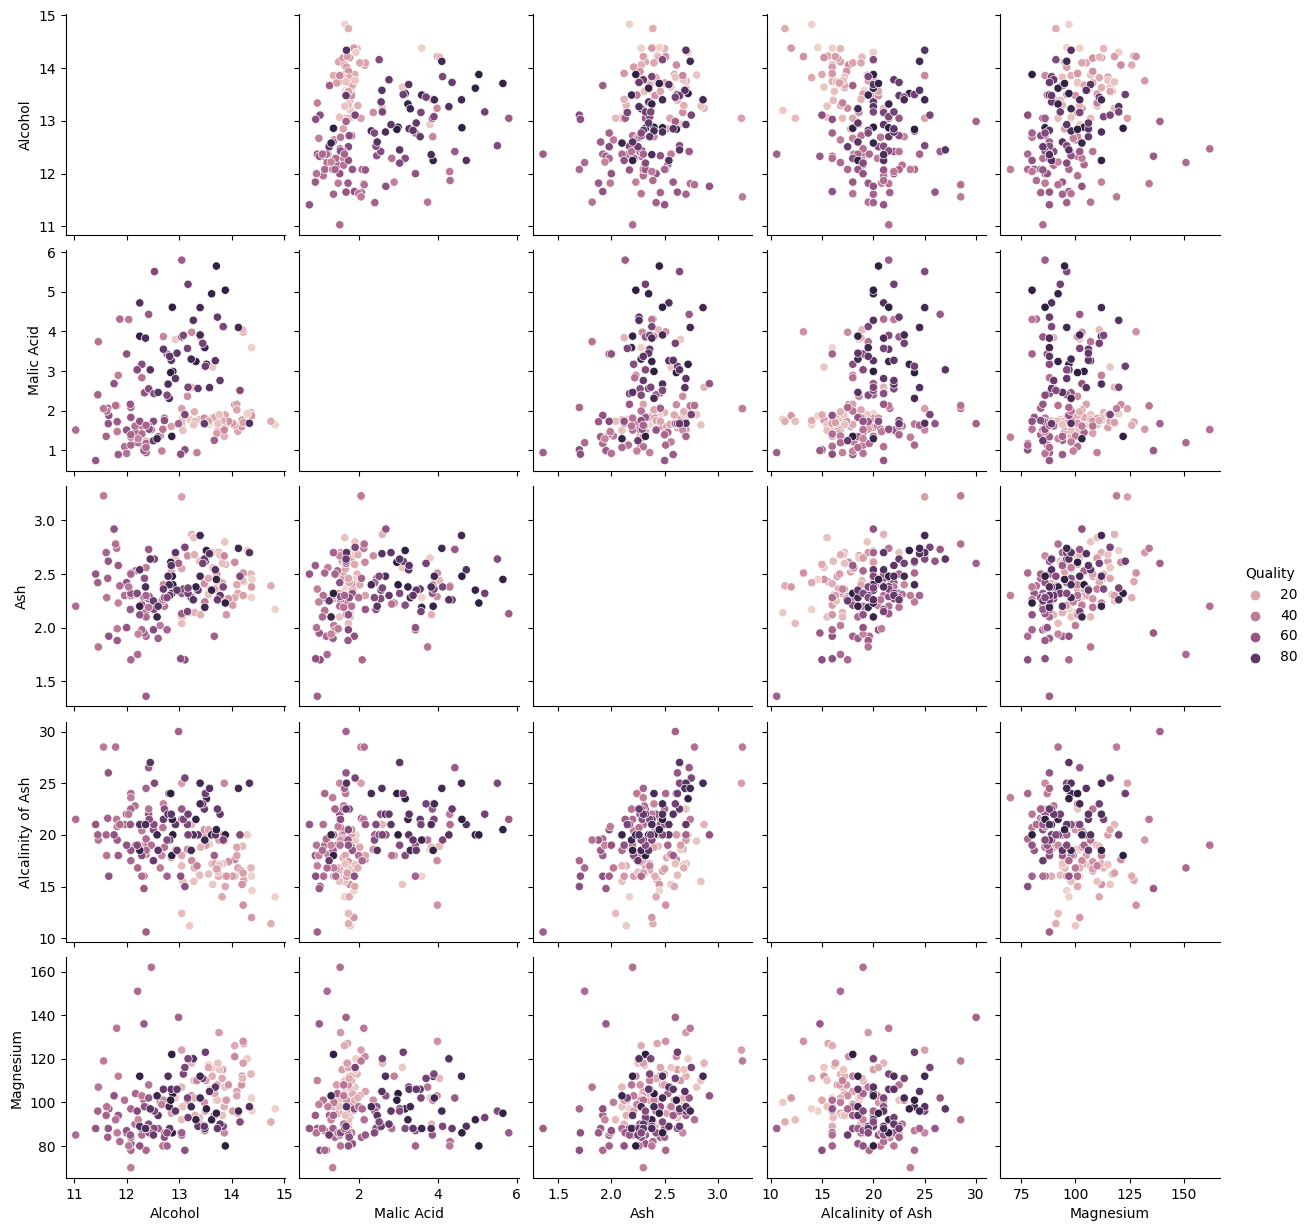

In [8]:
import seaborn as sns
# Crea un pairplot con la paleta personalizada
sns.pairplot(winE_df, hue="Quality")



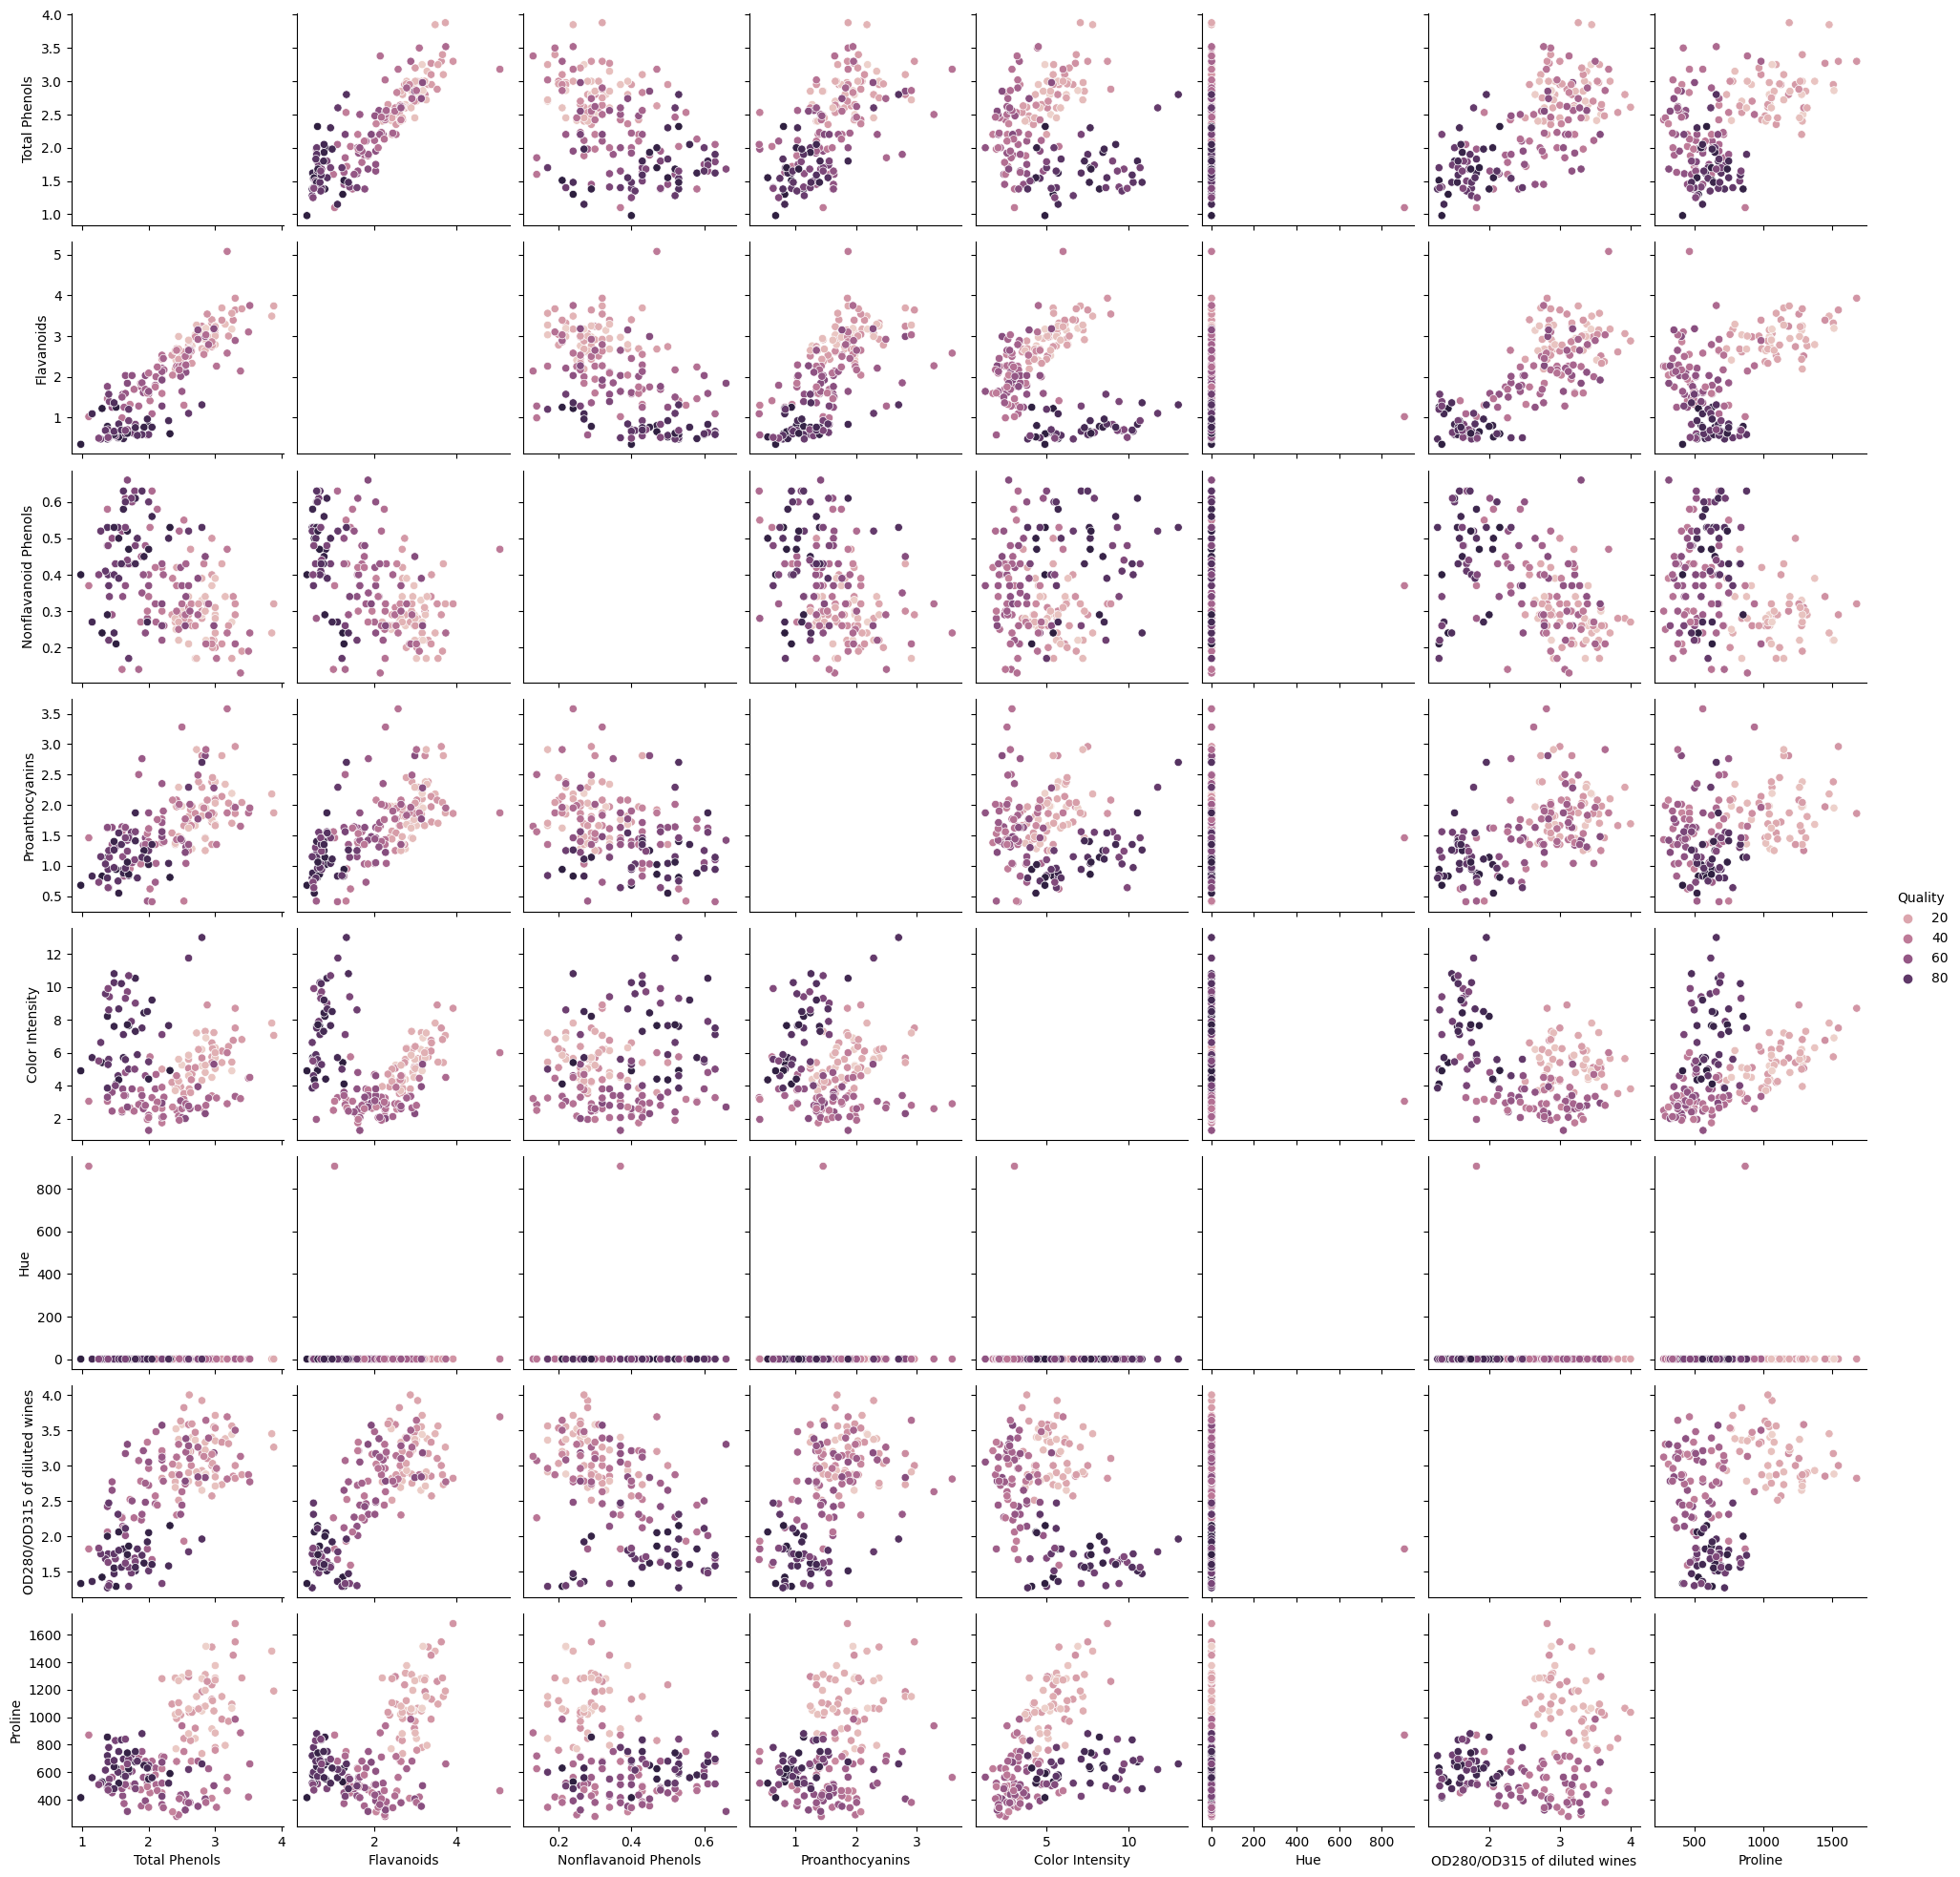

In [9]:
sns.pairplot(winE_df_2, hue="Quality")

<font face="Comic Sans MS,arial,verdana" color="DarkCyan" size =3>
Este segunda gráfica permite observar una clasificación o discriminación más clara visualmente por lo que esta va a ser las características a tomar en cuenta para el target. (winE_df_2)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



#<font face="Comic Sans MS,arial,verdana" color="MediumSlateBlue" size =8> Vamos a entrenar el Modelo

<font face="Comic Sans MS,arial,verdana" color="Black" size =3>
Para ello se va a realiza la regresión linea, el árbol de decisión y el bosque de regresión aleatoria, de manera que se pueda elegir cual es el algoritmo mas adecuado de acuerdo al error cuadrado.

> Primero se va a hacer un barrido para el estado aleatorio para saber como dan los errores cuadrados.

> Segundo se evalua cada modelo de acuerdo al error cuadrado, al error medio cuadrado y al error medio absoluto.

> Tercero se imprimen los resultados para tres estados aleatorios previamente decididos.

In [40]:
# recordar la importación de librerias
import numpy  as np
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.linear_model   	import LinearRegression
from sklearn.tree             import DecisionTreeRegressor
from sklearn.ensemble         import RandomForestRegressor
from sklearn.metrics          import r2_score, mean_squared_error, mean_absolute_error  # para poder medir cada algoritmo


# Función para evaluar el rendimiento de un modelo
def evaluate_model(predictions, y_true):
    r2 = r2_score(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    mae = mean_absolute_error(y_true, predictions)
    return r2, mse, mae

# Crear un arreglo de tamaños de conjunto de prueba de 0.5 hasta 0.95 en pasos de 0.05
test_sizes = [round(0.5 + i * 0.05, 2) for i in range(8)]

# Resultados de la evaluación de modelos para diferentes tamaños de conjunto de prueba y random_state
results_for_test_sizes = []

for test_size in test_sizes:
    # Generar una lista de random_states de dos en dos desde 10 hasta 90
    random_states = list(range(10, 91, 2))
    results_for_test_size = []

    for random_state in random_states:
        # Dividir los datos en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Modelo de Regresión Lineal
        linear_reg = LinearRegression()
        linear_reg.fit(X_train, y_train)
        linear_reg_predictions = linear_reg.predict(X_test)

        # Modelo de Árbol de Decisión
        decision_tree_reg = DecisionTreeRegressor(random_state=42)
        decision_tree_reg.fit(X_train, y_train)
        decision_tree_predictions = decision_tree_reg.predict(X_test)

        # Modelo de Random Forest
        random_forest_reg = RandomForestRegressor(random_state=42)
        random_forest_reg.fit(X_train, y_train)
        random_forest_predictions = random_forest_reg.predict(X_test)

        # Evaluar los modelos y guardar los resultados
        linear_reg_scores = evaluate_model(linear_reg_predictions, y_test)
        decision_tree_scores = evaluate_model(decision_tree_predictions, y_test)
        random_forest_scores = evaluate_model(random_forest_predictions, y_test)

        results_for_test_size.append({
            "Random State": random_state,
            "Test Size": test_size,
            "Linear Regression": linear_reg_scores,
            "Decision Tree": decision_tree_scores,
            "Random Forest": random_forest_scores
        })

    results_for_test_sizes.extend(results_for_test_size)

# Ahora tienes resultados para diferentes tamaños de conjunto de prueba y random_state



# Separar características (X) y etiquetas (y), features y tarjet
X = winE_df_2.drop("Quality", axis=1) # característica
y = winE_df_2["Quality"]              # tarjet
results = evaluate_models(X, y)

# Imprime los resultados
# Valores de Random State que deseas imprimir porque si hacemos todos eso queda muy largo
random_states_to_print = [10, 30, 50]

for result in results:
    if result['Random State'] in random_states_to_print:
        print(f"Random State: {result['Random State']}")
        print("Regresión Lineal:")
        print(f"R^2: {result['Linear Regression'][0]:.4f}")
        print(f"MSE: {result['Linear Regression'][1]:.4f}")
        print(f"MAE: {result['Linear Regression'][2]:.4f}")

        print("\nÁrbol de Decisión:")
        print(f"R^2: {result['Decision Tree'][0]:.4f}")
        print(f"MSE: {result['Decision Tree'][1]:.4f}")
        print(f"MAE: {result['Decision Tree'][2]:.4f}")

        print("\nRandom Forest:")
        print(f"R^2: {result['Random Forest'][0]:.4f}")
        print(f"MSE: {result['Random Forest'][1]:.4f}")
        print(f"MAE: {result['Random Forest'][2]:.4f}")
        print("\n")



Random State: 10
Regresión Lineal:
R^2: -9764.8074
MSE: 4783634.7127
MAE: 375.9616

Árbol de Decisión:
R^2: 0.4391
MSE: 274.7296
MAE: 12.9036

Random Forest:
R^2: 0.6436
MSE: 174.5715
MAE: 10.9450


Random State: 30
Regresión Lineal:
R^2: 0.7337
MSE: 197.2838
MAE: 11.2503

Árbol de Decisión:
R^2: 0.7110
MSE: 214.1153
MAE: 12.5016

Random Forest:
R^2: 0.8349
MSE: 122.3038
MAE: 9.4557


Random State: 50
Regresión Lineal:
R^2: 0.7784
MSE: 164.2442
MAE: 9.8907

Árbol de Decisión:
R^2: 0.7918
MSE: 154.3507
MAE: 9.9489

Random Forest:
R^2: 0.8635
MSE: 101.1750
MAE: 7.8856




![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



#<font face="Comic Sans MS,arial,verdana" color="MediumSlateBlue" size =5> Evaluamos los modelos para lo cual pasamos a una grafica del Error Medio Cuadratico vs el Estado de Aleatoriedad.

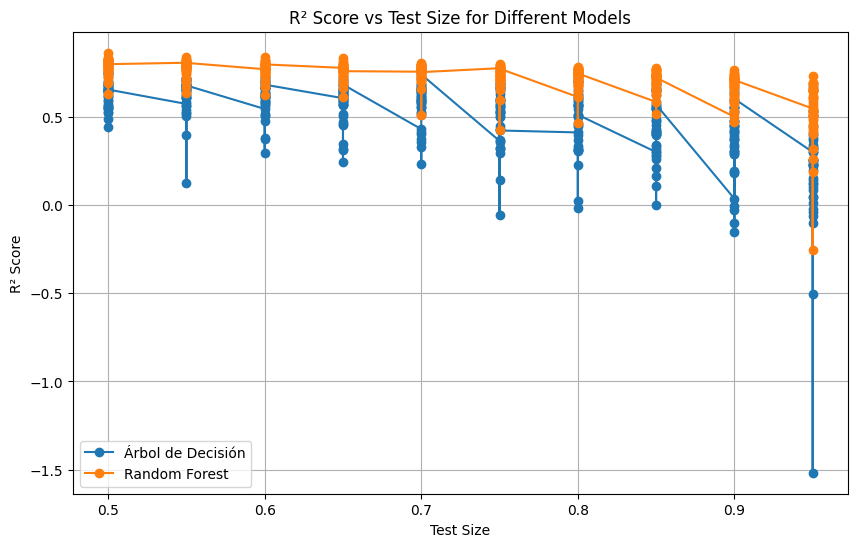

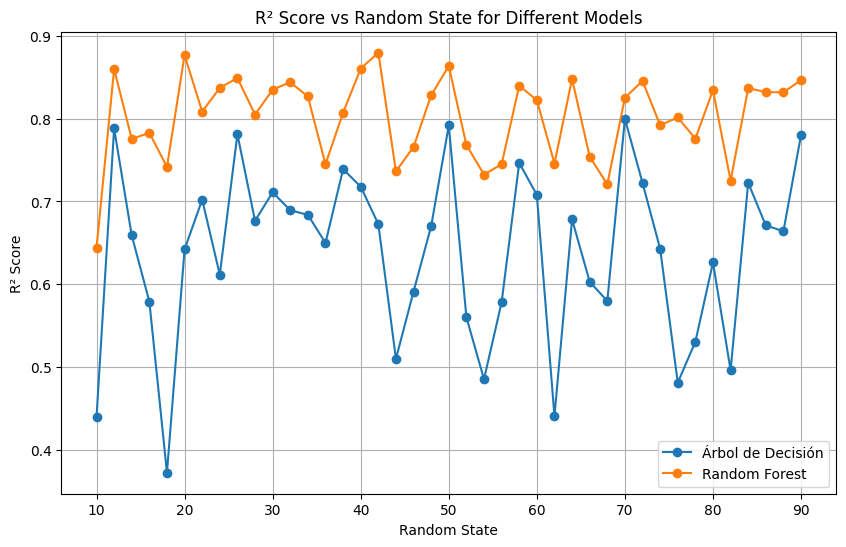

In [45]:
import matplotlib.pyplot as plt


# Extraer los valores de test_size y MSE de los resultados
test_sizes = [result['Test Size'] for result in results_for_test_sizes]
test_r2_linear = [result['Linear Regression'][0] for result in results_for_test_sizes]
test_r2_decision_tree = [result['Decision Tree'][0] for result in results_for_test_sizes]
test_r2_random_forest = [result['Random Forest'][0] for result in results_for_test_sizes]

# Crear la gráfica
plt.figure(figsize=(10, 6))
#plt.plot(test_sizes, test_r2_linear, marker='o', label='Regresión Lineal')
plt.plot(test_sizes, test_r2_decision_tree, marker='o', label='Árbol de Decisión')
plt.plot(test_sizes, test_r2_random_forest, marker='o', label='Random Forest')
plt.xlabel('Test Size')
plt.ylabel('R² Score')  # Cambiar la etiqueta del eje y
plt.title('R² Score vs Test Size for Different Models')  # Cambiar el título
plt.legend()
plt.grid(True)


# Resultados de la evaluación de modelos
random_states = [result['Random State'] for result in results]
r2_linear = [result['Linear Regression'][0] for result in results]
r2_decision_tree = [result['Decision Tree'][0] for result in results]
r2_random_forest = [result['Random Forest'][0] for result in results]

# Crear la gráfica
plt.figure(figsize=(10, 6))
##plt.plot(random_states, r2_linear, marker='o', label='Regresión Lineal') # esto lo comentamos porque si no el error da muy grande
plt.plot(random_states, r2_decision_tree, marker='o', label='Árbol de Decisión')
plt.plot(random_states, r2_random_forest, marker='o', label='Random Forest')
plt.xlabel('Random State')
plt.ylabel('R² Score')  # Cambiar la etiqueta del eje y
plt.title('R² Score vs Random State for Different Models')  # Cambiar el título
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


<font face="Comic Sans MS,arial,verdana" size =5>

> Una primera conclusión es que cuanto mayor sea el el tamaño de la muestra de prueba (test_size) para el entrenamiento del algoritmo mayor va ser error.

> Una segunda conclusión es que el algoritmo mas adecuado para los datos es el Random Forest puesto que muestra mejor comportamiento en cuanto al error con respecto al tamaño de la muestra y el estado de aleatoriedad.

> Una tercera conclusión se refiere a que la regresión lineal para los datos no se adecua a los datos, puesto que cuando se grafica el error desborda o sobrepasa el 100 % en algunos casos donde se hace el barrido.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



#<font face="Comic Sans MS,arial,verdana" color="MediumSlateBlue" size=5>Modelo de Bosques Aleatorios


In [66]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model     import LinearRegression
from sklearn.tree             import DecisionTreeRegressor
from sklearn.ensemble         import RandomForestRegressor
from sklearn.metrics          import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics          import accuracy_score

# Función para evaluar el modelo con diferentes valores de random_state
def evaluate_models(X, y):
    results = []

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

    # Modelo de Random Forest
    random_forest_reg = RandomForestRegressor(random_state=50)
    random_forest_reg.fit(X_train, y_train)
    random_forest_predictions = random_forest_reg.predict(X_test)

    random_forest_scores = evaluate_model(random_forest_predictions, y_test)
    results.append({

        "Random Forest": random_forest_scores
    })

    return results

# Función para evaluar las metricas de rendimiento de un modelo
def evaluate_model(predictions, y_true):
    r2 = r2_score(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    mae = mean_absolute_error(y_true, predictions)
    return r2, mse, mae

# Llama a la función para evaluar los modelos
X = winE_df_2.drop("Quality", axis=1)
y = winE_df_2["Quality"]
results = evaluate_models(X, y)


# Imprime los resultados
for result in results:

    print("\nRandom Forest:")
    print("\nEstas son las características por las cuales se escogió el Random Forest:")
    print(f"R^2: {result['Random Forest'][0]:.4f}")
    print(f"MSE: {result['Random Forest'][1]:.4f}")
    print(f"MAE: {result['Random Forest'][2]:.4f}")
    print("\n")



Random Forest:

Estas son las características por las cuales se escogió el Random Forest:
R^2: 0.8748
MSE: 84.2991
MAE: 7.9672




![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



#<font face="Comic Sans MS,arial,verdana" color="OrangeRed	" size=6 bgcolor="LightGray">Vamos a realizar la predicción de acuerdo a un nuevo set de datos para determinar la calidad de vino en este caso de Antagonía


In [77]:
import pandas as pd

# Crear un diccionario con los datos
data = {

    'Total Phenols': [1.95],
    'Flavanoids': [1.33],
    'Nonflavanoid Phenols': [0.44],
    'Proanthocyanins': [1.37],
    'Color Intensity': [2.5],
    'Hue': [1],
    'OD280/OD315 of diluted wines': [2.75],
    'Proline': [723]
}

# Crear el DataFrame
wine_new_data = pd.DataFrame(data)

#Función para ver la prediccion
def prediction(X, y, df_predic_wine):
    results = []

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

    # Modelo de Random Forest
    random_forest_reg = RandomForestRegressor(random_state=50)
    random_forest_reg.fit(X_train, y_train)
    random_forest_predictions = random_forest_reg.predict(X_test)

    new_predictions = random_forest_reg.predict(df_predic_wine)

    return new_predictions

def categorizar_calidad(valor):
    if valor < 50:
        return "Muy Malo"
    elif valor < 65:
        return "Malo"
    elif valor < 75:
        return "Aceptable"
    elif valor < 85:
        return "Bueno"
    else:
        return "Excelente"


# Llama a la función para predecir
X = winE_df_2.drop("Quality", axis=1)
y = winE_df_2["Quality"]
result = (int (prediction(X, y, wine_new_data)))


print(f"La predicción para la calidad del vino Antagonia es {calidad_vino} pues su valor fue de {result} ")

La predicción para la calidad del vino Antagonia es Malo pues su valor fue de 50 


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



#<font face="Comic Sans MS,arial,verdana" color="OrangeRed	" size=6 bgcolor="LightGray"> Segunda Comprobación

> Como yo separé los datos en dos por lo que me mostró la gráfica inicialmente, quería saber cual sería la predicción en el caso del primer conjunto de datos y el valor númerico que me entregó no fue tan diferente lo que me sorprendió.

In [82]:
import pandas as pd

# Crear un diccionario con los datos
data = {
    'Alcohol': [13.72],
    'Malic Acid': [1.82],
    'Ash': [2.46],
    'Alcalinity of Ash': [23],
    'Magnesium': [85]

}

# Crear el DataFrame
wine_new_data = pd.DataFrame(data)

#Función para ver la prediccion
def prediction(X, y, df_predic_wine):
    results = []

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

    # Modelo de Random Forest
    random_forest_reg = RandomForestRegressor(random_state=50)
    random_forest_reg.fit(X_train, y_train)
    random_forest_predictions = random_forest_reg.predict(X_test)

    new_predictions = random_forest_reg.predict(df_predic_wine)

    return new_predictions

def categorizar_calidad(valor):
    if valor <= 49:
        return "Muy Malo"
    elif valor < 65:
        return "Malo"
    elif valor < 75:
        return "Aceptable"
    elif valor < 85:
        return "Bueno"
    else:
        return "Excelente"



# Llama a la función para predecir
X = winE_df.drop("Quality", axis=1)
y = winE_df["Quality"]
result = (int(prediction(X, y, wine_new_data)))

print(f"La predicción para la calidad del vino Antagonia es {calidad_vino} pues su valor fue de {result} ")

La predicción para la calidad del vino Antagonia es Malo pues su valor fue de 49 
